In [1]:
# Importando as bibliotecas
import pandas as pd;
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;

In [2]:
# Lendo o Dataset
df_autismo_adulto = pd.read_csv('Autism-Adult-Data.csv')

In [3]:
# Renomeando as colunas
df_autismo_adulto.columns = ["AQ01", "AQ02", "AQ03", "AQ04", "AQ05","AQ06","AQ07","AQ08","AQ09","AQ10", "age","gender", "ethnicity", "jundice", "austim", "contry_of_res", "used_app_before", "result numeric", "age_desc", "relation", "Class/ASD"]

In [4]:
# Visualizando as 10 primeiras linhas do dataset
df_autismo_adulto.head(10)

,AQ01,AQ02,AQ03,AQ04,AQ05,AQ06,AQ07,AQ08,AQ09,AQ10,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result numeric,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
1,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
2,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
3,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
4,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
5,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
6,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES


In [5]:
# Substituuindo valores com '?' e outro outlier ('383') por Nan para posteriormente eliminá-los.
df_autismo_adulto = df_autismo_adulto.replace('?', np.nan).replace('383', np.nan)

In [6]:
# Visualizando a quantidade de instâncias e atributos contidas no Dataframe
df_autismo_adulto.shape

(703, 21)

In [7]:
# Visualizando as informações gerais do Dataframe
df_autismo_adulto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQ01             703 non-null    int64 
 1   AQ02             703 non-null    int64 
 2   AQ03             703 non-null    int64 
 3   AQ04             703 non-null    int64 
 4   AQ05             703 non-null    int64 
 5   AQ06             703 non-null    int64 
 6   AQ07             703 non-null    int64 
 7   AQ08             703 non-null    int64 
 8   AQ09             703 non-null    int64 
 9   AQ10             703 non-null    int64 
 10  age              700 non-null    object
 11  gender           703 non-null    object
 12  ethnicity        608 non-null    object
 13  jundice          703 non-null    object
 14  austim           703 non-null    object
 15  contry_of_res    703 non-null    object
 16  used_app_before  703 non-null    object
 17  result numeric   703 non-null    in

In [8]:
# Visualizando a quantidade total de dados nulos no Dataset
df_autismo_adulto.isnull().sum()

AQ01                0
AQ02                0
AQ03                0
AQ04                0
AQ05                0
AQ06                0
AQ07                0
AQ08                0
AQ09                0
AQ10                0
age                 3
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result numeric      0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [9]:
# Visualizando a porcentagem de dados nulos no Dataset
df_autismo_adulto.isnull().sum()/df_autismo_adulto.shape[0]*100

AQ01                0.000000
AQ02                0.000000
AQ03                0.000000
AQ04                0.000000
AQ05                0.000000
AQ06                0.000000
AQ07                0.000000
AQ08                0.000000
AQ09                0.000000
AQ10                0.000000
age                 0.426743
gender              0.000000
ethnicity          13.513514
jundice             0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result numeric      0.000000
age_desc            0.000000
relation           13.513514
Class/ASD           0.000000
dtype: float64

In [10]:
# Elimando as colunas com maior incidência de dados dados nulos, pois assim permacemos com o mesmo números de entrada de dados.
df_autismo_adulto = df_autismo_adulto.drop(columns=['ethnicity', 'relation'], inplace = False, axis = 1)

In [11]:
# Eliminar apenas algumas linhas com dados nulos
df_autismo_adulto = df_autismo_adulto.dropna(inplace = False, axis = 0)

In [12]:
# Confirmando o número de instância da pesquisa após a remoção dos dados ausentes
df_autismo_adulto.shape

(700, 19)

In [13]:
# Visualizando novamente se ainda existe dados nulos no Dataset 
df_autismo_adulto.isnull().sum()

AQ01               0
AQ02               0
AQ03               0
AQ04               0
AQ05               0
AQ06               0
AQ07               0
AQ08               0
AQ09               0
AQ10               0
age                0
gender             0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result numeric     0
age_desc           0
Class/ASD          0
dtype: int64

In [14]:
# Visualizando um panorama das idades dos participantes da pesquisa
df_autismo_adulto['age'].value_counts()

21    49
20    46
23    37
22    37
19    35
24    34
27    31
18    31
30    30
29    27
25    27
26    27
28    24
31    21
32    18
17    18
35    17
37    17
40    16
33    16
42    15
36    13
34    12
38    12
43    11
44    10
47     8
39     7
55     6
46     6
53     6
50     5
52     5
48     4
45     4
49     3
41     3
58     2
61     2
56     2
54     2
51     1
60     1
59     1
64     1
Name: age, dtype: int64

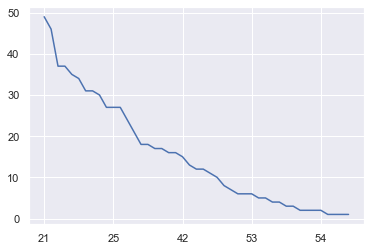

In [15]:
# Visualizando a distribuição de frequência das idades dos participantes da pesquisa
df_autismo_adulto['age'].value_counts().plot();

In [16]:
# Visualizando o participante mais novo da pesquisa
df_autismo_adulto['age'].min()

'17'

In [17]:
# Visualizando o participante com maior idade
df_autismo_adulto['age'].max()

'64'

In [18]:
# Visualizando a quantidade de participantes com Autismo
df_autismo_adulto['austim'].value_counts()

no     609
yes     91
Name: austim, dtype: int64

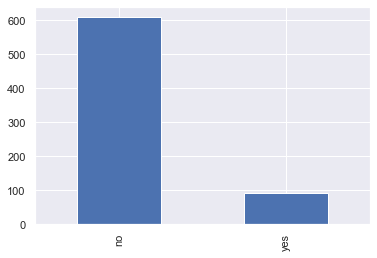

In [19]:
# Visualizando a distribuição de frequência dos participantes com Autismo
df_autismo_adulto['austim'].value_counts().plot.bar();

In [20]:
df_autismo_adulto['austim'].value_counts()/df_autismo_adulto.shape[0]*100

no     87.0
yes    13.0
Name: austim, dtype: float64

In [46]:
# Criando um dataset apenas com o grupo dos adultos com TEA
adultos_TEA = df_autismo_adulto.loc[df_autismo_adulto['austim'] == 'yes']

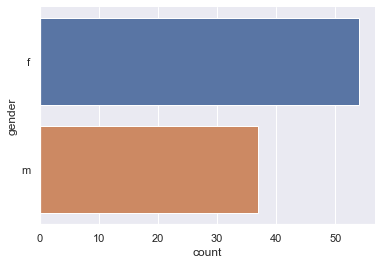

In [57]:
sns.countplot(data = adultos_TEA, y='gender', order = adultos_TEA['gender'].value_counts().index)
sns.despine()

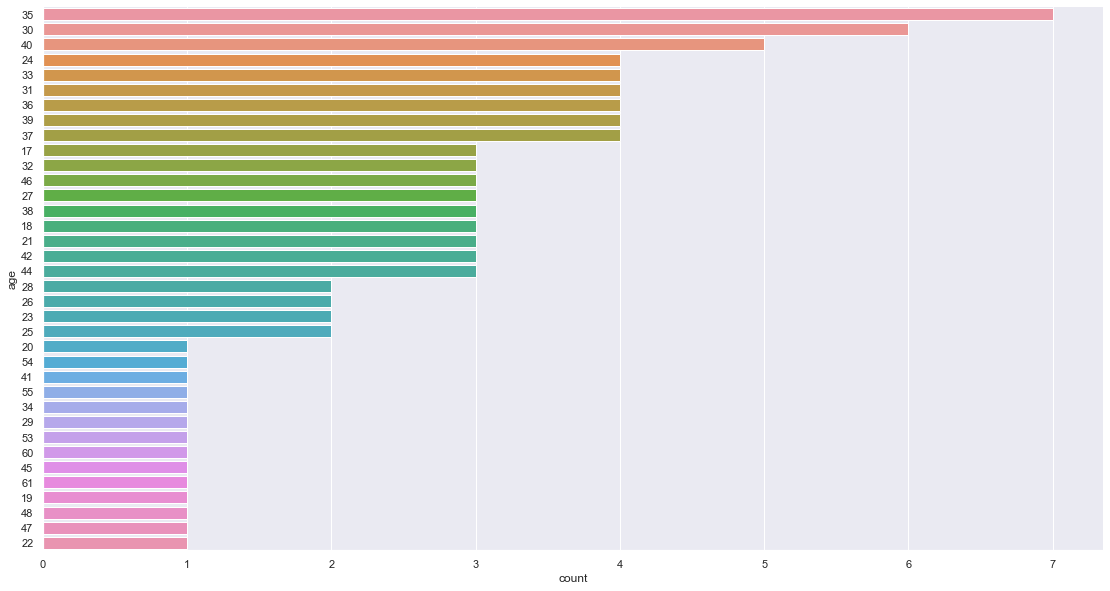

In [51]:
fig = plt.figure(figsize=(19,10))
sns.countplot(data= adultos_TEA, y= 'age', order = adultos_TEA["age"].value_counts().index)
sns.despine()

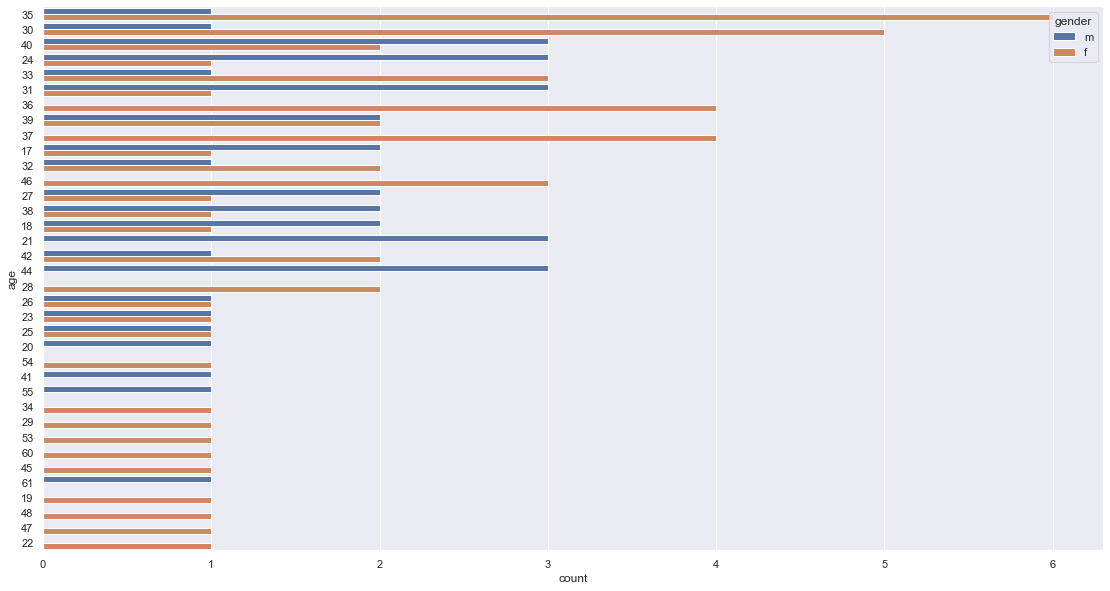

In [56]:
fig = plt.figure(figsize=(19,10))
sns.countplot(data= adultos_TEA, y= 'age', hue = 'gender', order = adultos_TEA["age"].value_counts().index)
sns.despine()

In [35]:
df_autismo_adulto.iloc[4]

AQ01                             1
AQ02                             1
AQ03                             1
AQ04                             1
AQ05                             1
AQ06                             0
AQ07                             1
AQ08                             1
AQ09                             1
AQ10                             1
age                             36
gender                           m
jundice                        yes
austim                          no
contry_of_res      'United States'
used_app_before                 no
result numeric                   9
age_desc             '18 and more'
Class/ASD                      YES
Name: 4, dtype: object

In [43]:
# Salvando a base de dados
df_autismo_adulto.to_csv("df_autismo_adultos.csv", index= False)